In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


In [34]:
cols17 = [ 'ID_ESCOLA',  'ID_UF',  'Estrutura','TratamentoLixo','Internet', 'PCD', 'NO_ENTIDADE']
cols19 = [ 'CO_ENTIDADE',  'ID_UF',  'Estrutura','TratamentoLixo','Internet', 'PCD', 'NO_ENTIDADE']

In [35]:
base17 = pd.read_csv('inep_saeb_merge_fatorial_2017.csv', sep='\t', usecols = cols17)

base19 = pd.read_csv('inep_saeb_merge_fatorial_2019.csv', sep='\t', usecols = cols19)

In [36]:
base17

,ID_UF,ID_ESCOLA,NO_ENTIDADE,Estrutura,TratamentoLixo,Internet,PCD
0,41,41042476,AFRANIO PEIXOTO E E EF,1.03,-0.18,0.52,-0.29
1,41,41042590,BOSCO E M DOM EI EF,0.09,-0.54,1.07,-0.73
2,41,41120027,TEREZA BACIL DE SOUZA DE LIMA E M EI EF,-0.42,-0.09,0.35,-0.16
3,41,41120230,NOSSA SRA PERPETUO SOCORRO E M EI EF,0.64,0.31,-0.81,-0.25
4,41,41120388,SELBMANN C E EF M,0.43,1.24,-2.05,-0.29
...,...,...,...,...,...,...,...
58361,53,53068157,CEF 02 DA ESTRUTURAL,0.17,0.98,0.28,-0.63
58362,53,53068173,EC 831 DE SAMAMBAIA,-0.03,-0.37,0.66,-0.30
58363,53,53068203,EC 02 DO ITAPOA,0.03,0.08,0.90,-0.14
58364,53,53068220,EC DOM BOSCO,-1.92,1.37,0.42,-0.11


In [37]:
base19

,ID_UF,CO_ENTIDADE,NO_ENTIDADE,Estrutura,TratamentoLixo,PCD,Internet
0,11,11024666,EMEIEF BOA ESPERANCA,-1.09,-0.22,0.29,0.14
1,11,11024682,EEEF EURIDICE LOPES PEDROSO,-0.97,0.73,1.53,0.58
2,11,11024828,EMEIEF IZIDORO STEDILE,-1.06,-0.23,-0.50,0.04
3,11,11024968,EEEMTI JUSCELINO KUBITSCHEK DE OLIVEIRA,-1.01,-0.24,-0.70,0.55
4,11,11025077,EMEIEF MARIA DE SOUZA PEGO,-1.09,-0.22,0.08,-0.03
...,...,...,...,...,...,...,...
62663,53,53068190,EC 01 DO PORTO RICO,-1.22,-0.22,-0.06,0.21
62664,53,53068203,EC 02 DO ITAPOA,-1.23,0.11,1.04,0.23
62665,53,53068211,CEF MIGUEL ARCANJO,-1.11,-0.22,1.51,-0.06
62666,53,53068220,EC DOM BOSCO,-1.26,-0.20,-0.85,0.04


In [38]:
list(base17)

['ID_UF',
 'ID_ESCOLA',
 'NO_ENTIDADE',
 'Estrutura',
 'TratamentoLixo',
 'Internet',
 'PCD']

In [39]:
list(base19)

['ID_UF',
 'CO_ENTIDADE',
 'NO_ENTIDADE',
 'Estrutura',
 'TratamentoLixo',
 'PCD',
 'Internet']

In [40]:
base19 = base19.rename(columns={'CO_ENTIDADE': 'ID_ESCOLA'})

In [41]:
base17['Ciclo'] = 2017
base19['Ciclo'] = 2019

In [42]:
#base17 = base17.rename(columns={c: c+'_17' for c in base17.columns if c not in ['ID_ESCOLA', 'ID_UF']})
#base19 = base19.rename(columns={c: c+'_19' for c in base19.columns if c not in ['ID_ESCOLA', 'ID_UF']})

In [43]:
#df = pd.merge(base17, base19, on='ID_ESCOLA', how='outer')
frames = [base17, base19]
df = pd.concat(frames)
df

,ID_UF,ID_ESCOLA,NO_ENTIDADE,Estrutura,TratamentoLixo,Internet,PCD,Ciclo
0,41,41042476,AFRANIO PEIXOTO E E EF,1.03,-0.18,0.52,-0.29,2017
1,41,41042590,BOSCO E M DOM EI EF,0.09,-0.54,1.07,-0.73,2017
2,41,41120027,TEREZA BACIL DE SOUZA DE LIMA E M EI EF,-0.42,-0.09,0.35,-0.16,2017
3,41,41120230,NOSSA SRA PERPETUO SOCORRO E M EI EF,0.64,0.31,-0.81,-0.25,2017
4,41,41120388,SELBMANN C E EF M,0.43,1.24,-2.05,-0.29,2017
...,...,...,...,...,...,...,...,...
62663,53,53068190,EC 01 DO PORTO RICO,-1.22,-0.22,0.21,-0.06,2019
62664,53,53068203,EC 02 DO ITAPOA,-1.23,0.11,0.23,1.04,2019
62665,53,53068211,CEF MIGUEL ARCANJO,-1.11,-0.22,-0.06,1.51,2019
62666,53,53068220,EC DOM BOSCO,-1.26,-0.20,0.04,-0.85,2019


In [44]:
df_filtrado = df.loc[df['ID_ESCOLA'] == 41042476]
df_filtrado

,ID_UF,ID_ESCOLA,NO_ENTIDADE,Estrutura,TratamentoLixo,Internet,PCD,Ciclo
0,41,41042476,AFRANIO PEIXOTO E E EF,1.03,-0.18,0.52,-0.29,2017
49160,41,41042476,AFRANIO PEIXOTO E E EF,-0.38,-0.23,0.82,0.65,2019


In [57]:
df_media = df.groupby(['ID_UF', 'Ciclo']).mean()[['Estrutura', 'TratamentoLixo', 'Internet', 'PCD']]

df_media = df_media.reset_index()
df_media.columns = ['ID_UF','Ciclo','Estrutura', 'TratamentoLixo', 'Internet', 'PCD']

df_media

,ID_UF,Ciclo,Estrutura,TratamentoLixo,Internet,PCD
0,11,2017,0.355959,-0.791952,0.171233,0.152175
1,11,2019,-1.016852,-0.093300,0.225875,0.677963
2,12,2017,-0.012826,-0.394193,0.031398,0.132298
3,12,2019,-1.071921,-0.059726,0.119970,1.140488
4,13,2017,-0.375578,-0.380321,-0.694568,0.007972
5,13,2019,-0.543280,-0.143387,0.090154,0.014355
6,14,2017,0.304286,-0.520204,-0.531020,0.099932
7,14,2019,-1.381371,-0.214743,0.370857,0.394057
8,15,2017,-0.218613,-0.802933,-0.394446,0.136450
9,15,2019,-0.575539,-0.024661,-0.187623,0.270910


In [72]:
df_media['Estado'] = df_media['ID_UF']
dict_uf= {11:'RO',12:'AC',13:'AM',14:'RR',15:'PA',16:'AP',17:'TO',21:'MA',22:'PI',23:'CE',24:'RN',
              25:'PB',26:'PE',27:'AL',28:'SE',29:'BA',31:'MG',32:'ES',33:'RJ',35:'SP',41:'PR',42:'SC',43:'RS',50:'MS',
              51:'MT',52:'GO',53:'DF',}
df_media = df_media.replace({"Estado": dict_uf})
#df_media

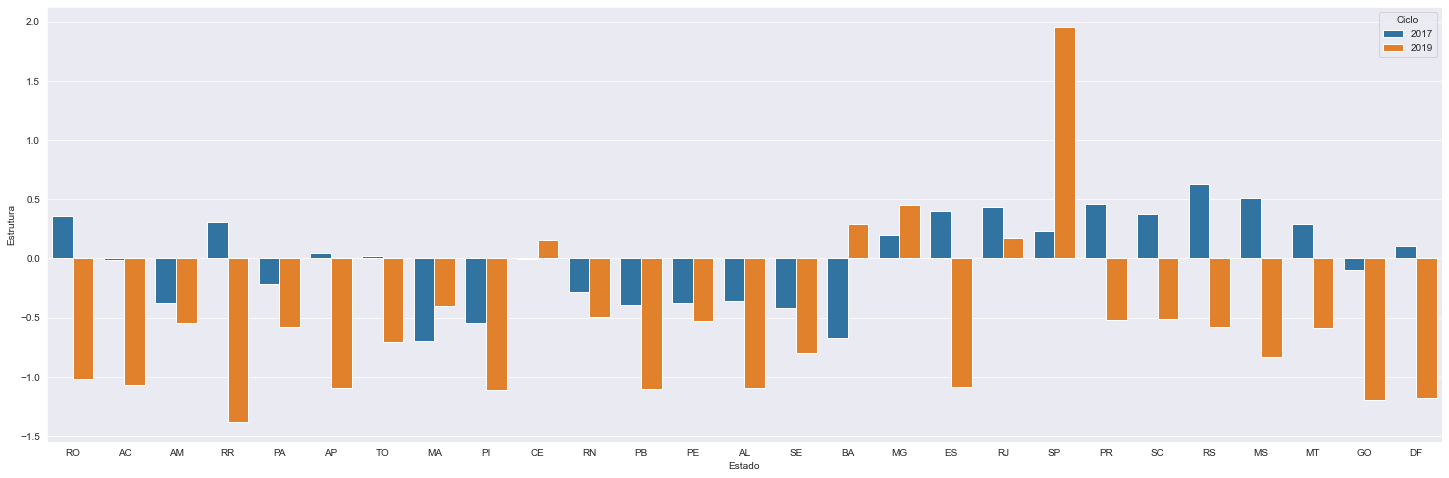

In [73]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,8))
sns.barplot(x = "Estado", y = "Estrutura", data = df_media, hue='Ciclo')

plt.show()

Text(0, 0.5, 'Fator PCD')

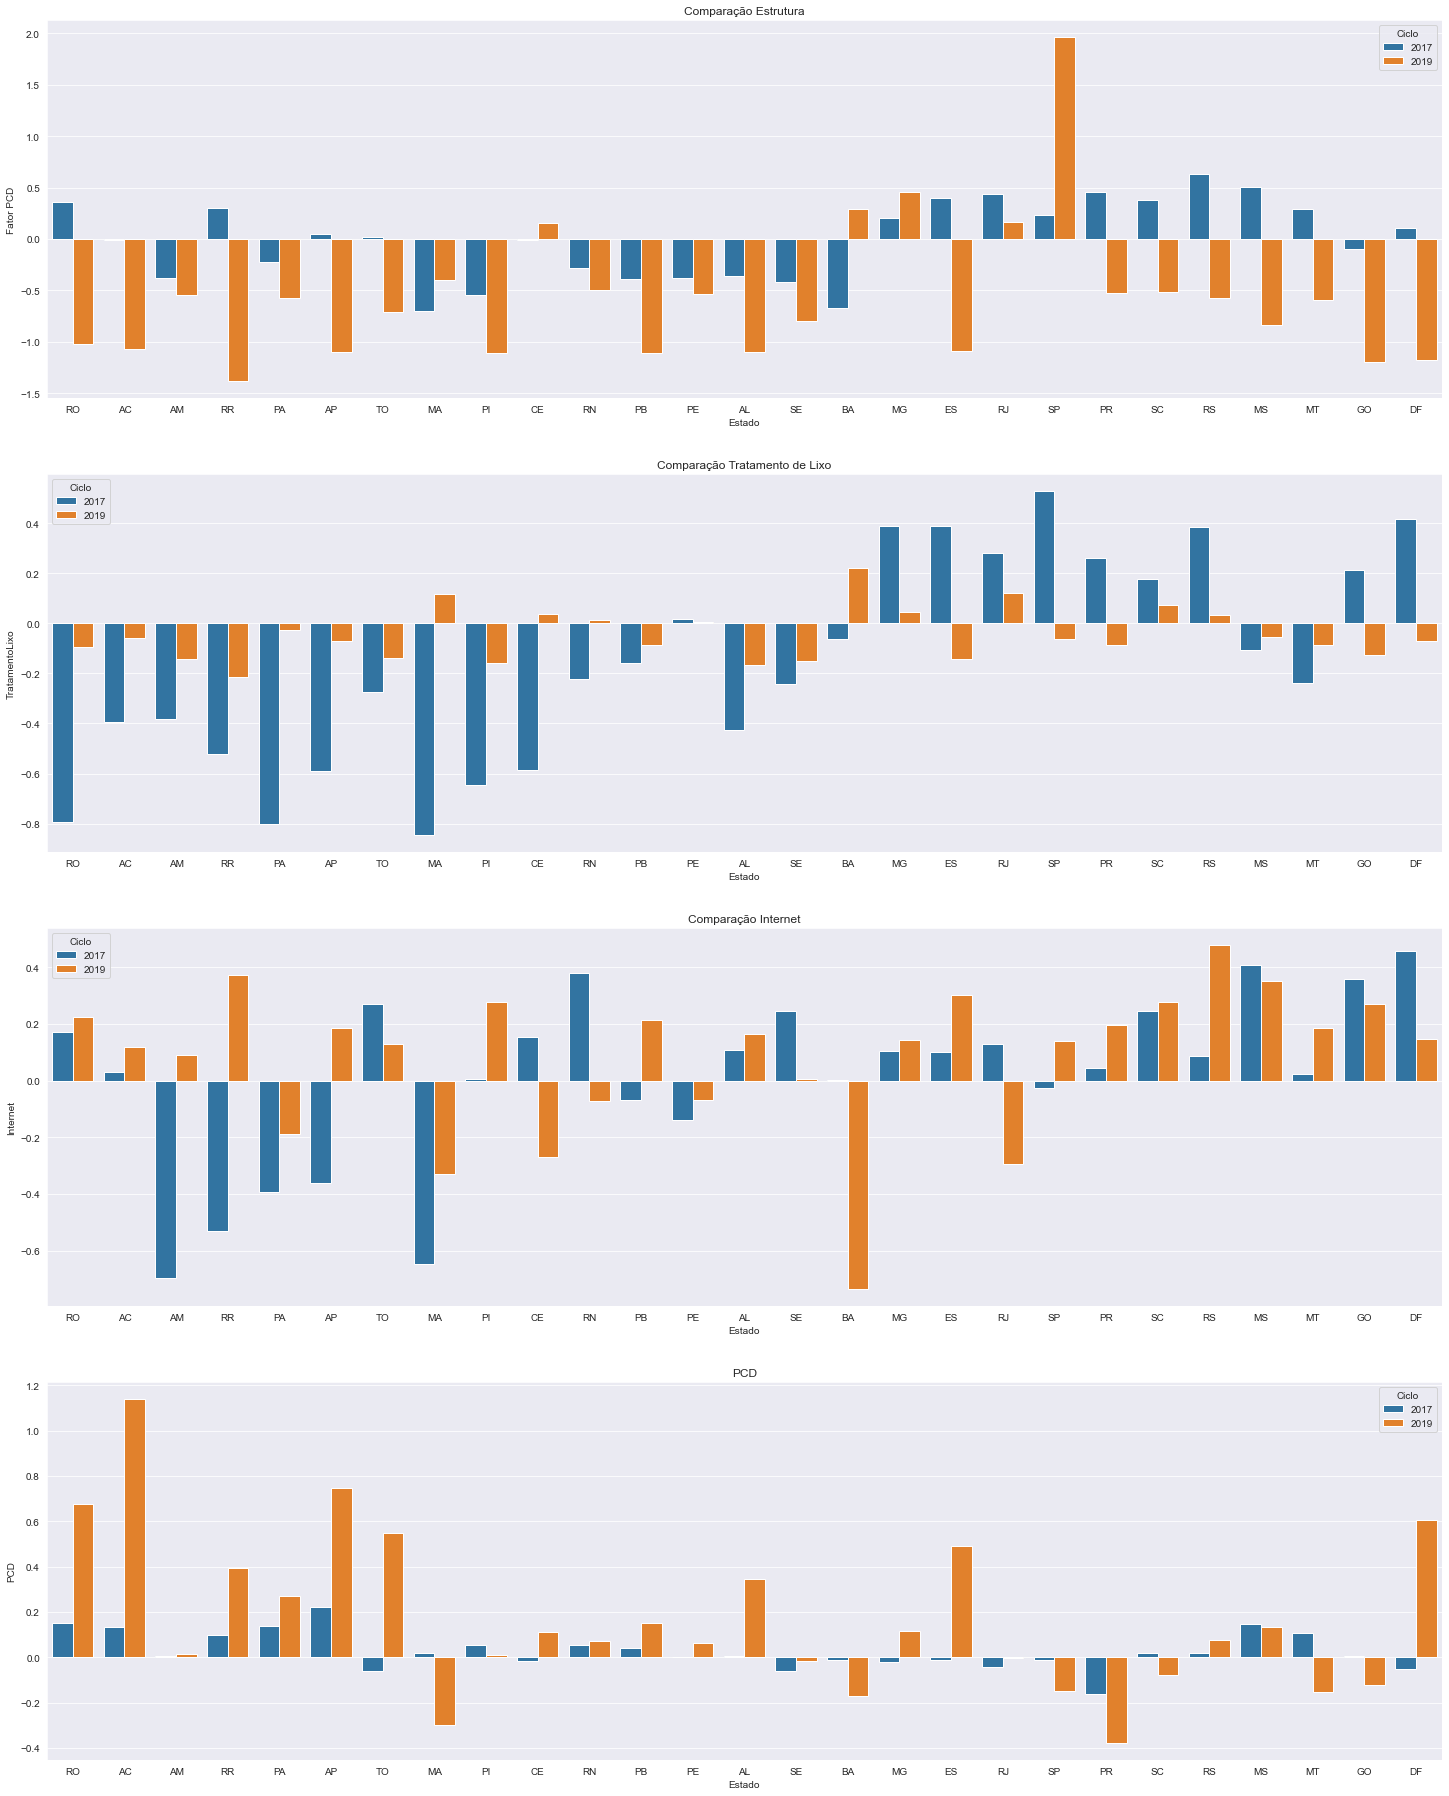

In [86]:
fig, axs = plt.subplots(4, 1, figsize=(25, 32))

sns.barplot(ax=axs[0], x = "Estado", y = "Estrutura", data = df_media, hue='Ciclo')
sns.barplot(ax=axs[1], x = "Estado", y = "TratamentoLixo", data = df_media, hue='Ciclo')
sns.barplot(ax=axs[2], x = "Estado", y = "Internet", data = df_media, hue='Ciclo')
sns.barplot(ax=axs[3], x = "Estado", y = "PCD", data = df_media, hue='Ciclo')
#sns.barplot(ax= 3, x = "Estado", y = "Estrutura", data = df_media, hue='Ciclo')

axs[0].set_title('Comparação Estrutura')
axs[1].set_title('Comparação Tratamento de Lixo')
axs[2].set_title('Comparação Internet')
axs[3].set_title('PCD')

axs[0].set_ylabel('Fator Estrutura')
axs[0].set_ylabel('Fator Tratamento de Lixo')
axs[0].set_ylabel('Fator Internet')
axs[0].set_ylabel('Fator PCD')



Text(0, 0.5, 'Fator Tratamento de Lixo')

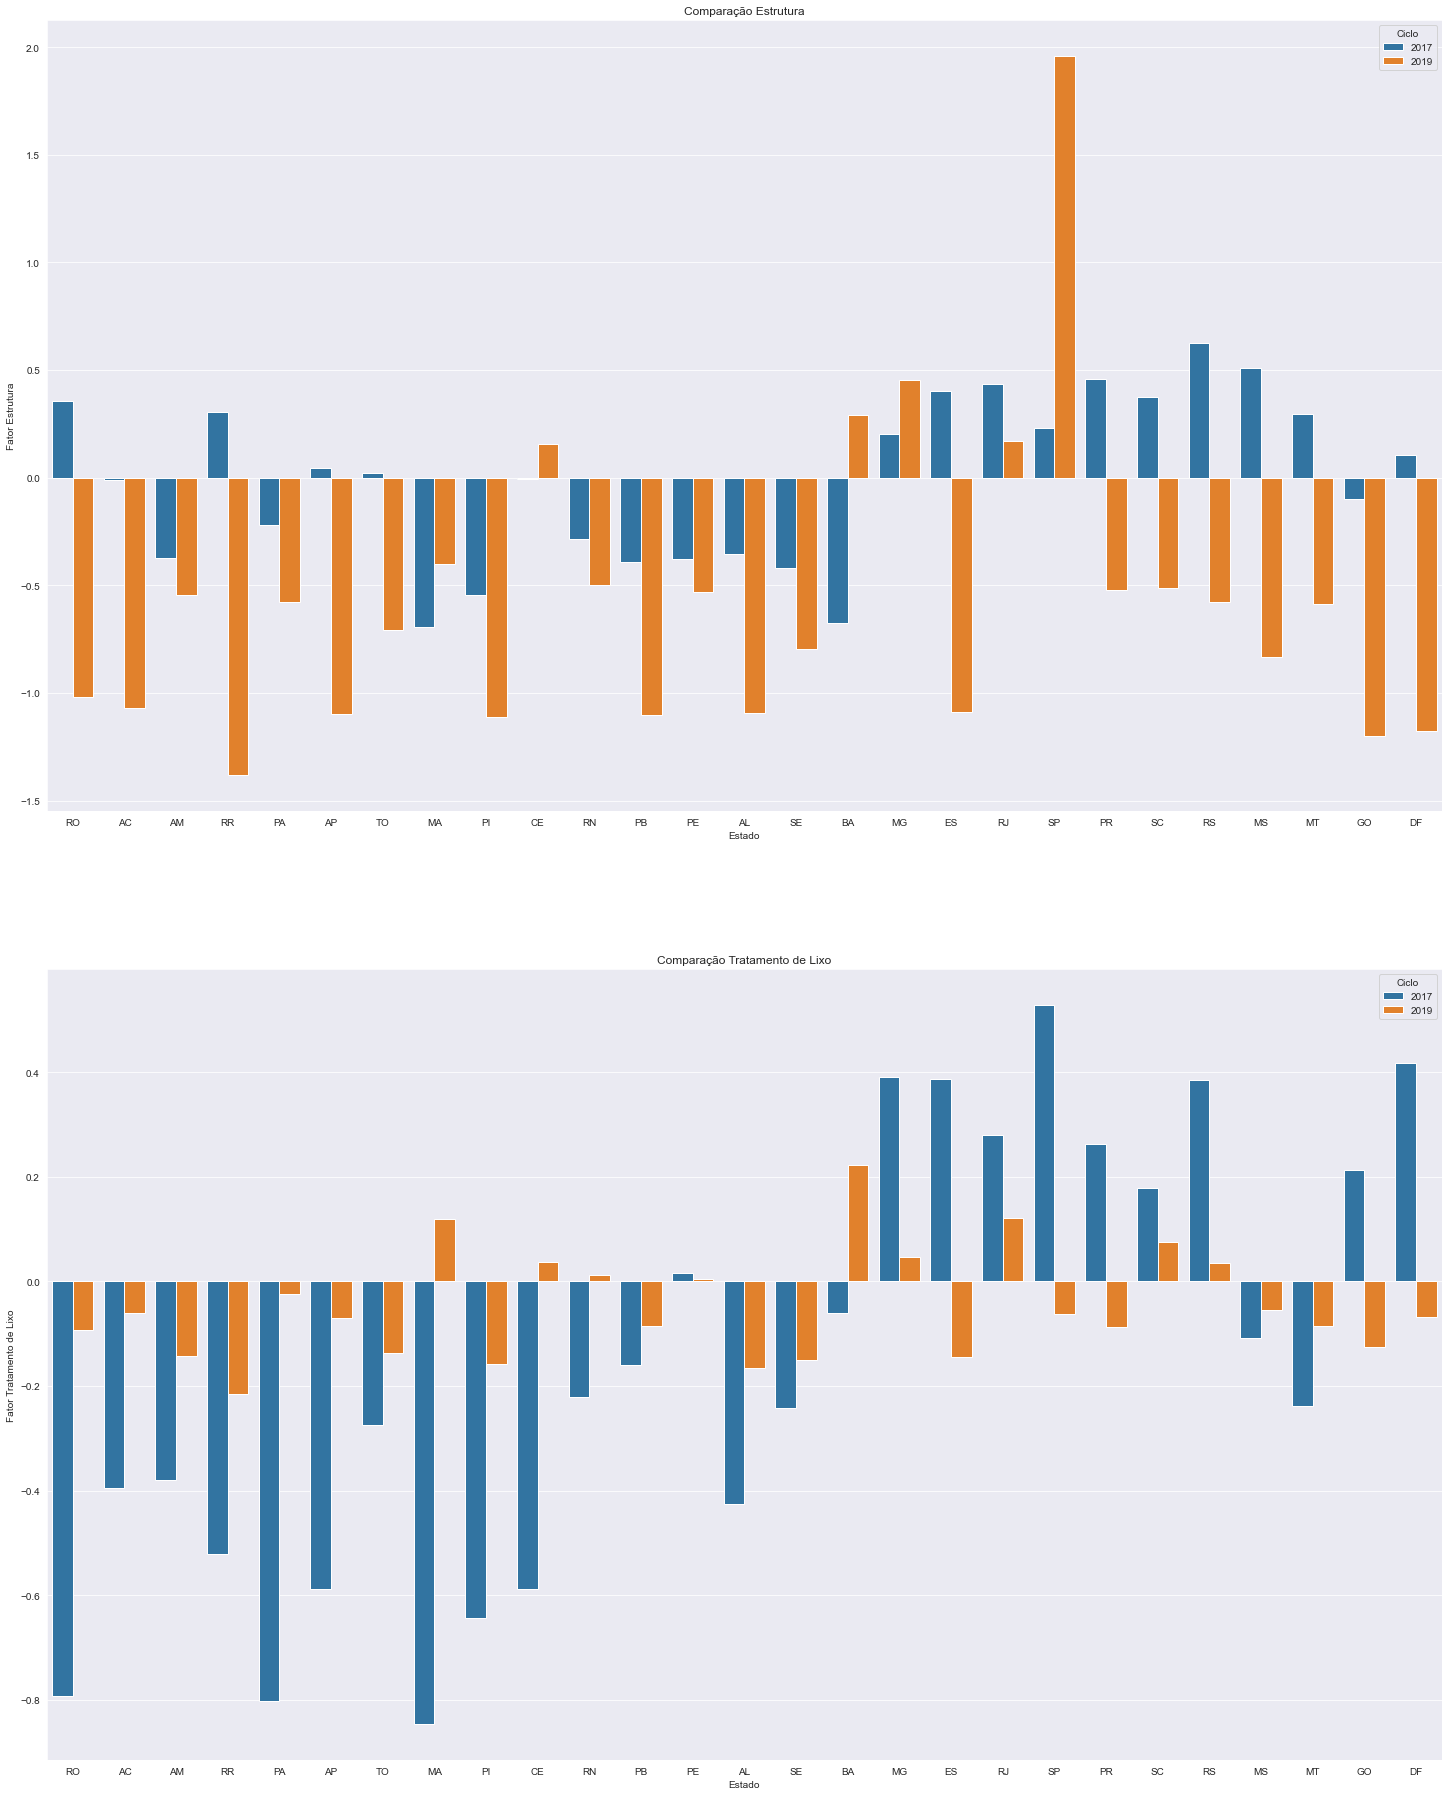

In [88]:
fig, axs = plt.subplots(2, 1, figsize=(25, 32))

sns.barplot(ax=axs[0], x = "Estado", y = "Estrutura", data = df_media, hue='Ciclo')
sns.barplot(ax=axs[1], x = "Estado", y = "TratamentoLixo", data = df_media, hue='Ciclo')


axs[0].set_title('Comparação Estrutura')
axs[1].set_title('Comparação Tratamento de Lixo')


axs[0].set_ylabel('Fator Estrutura')
axs[1].set_ylabel('Fator Tratamento de Lixo')




Text(0, 0.5, 'Fator PCD')

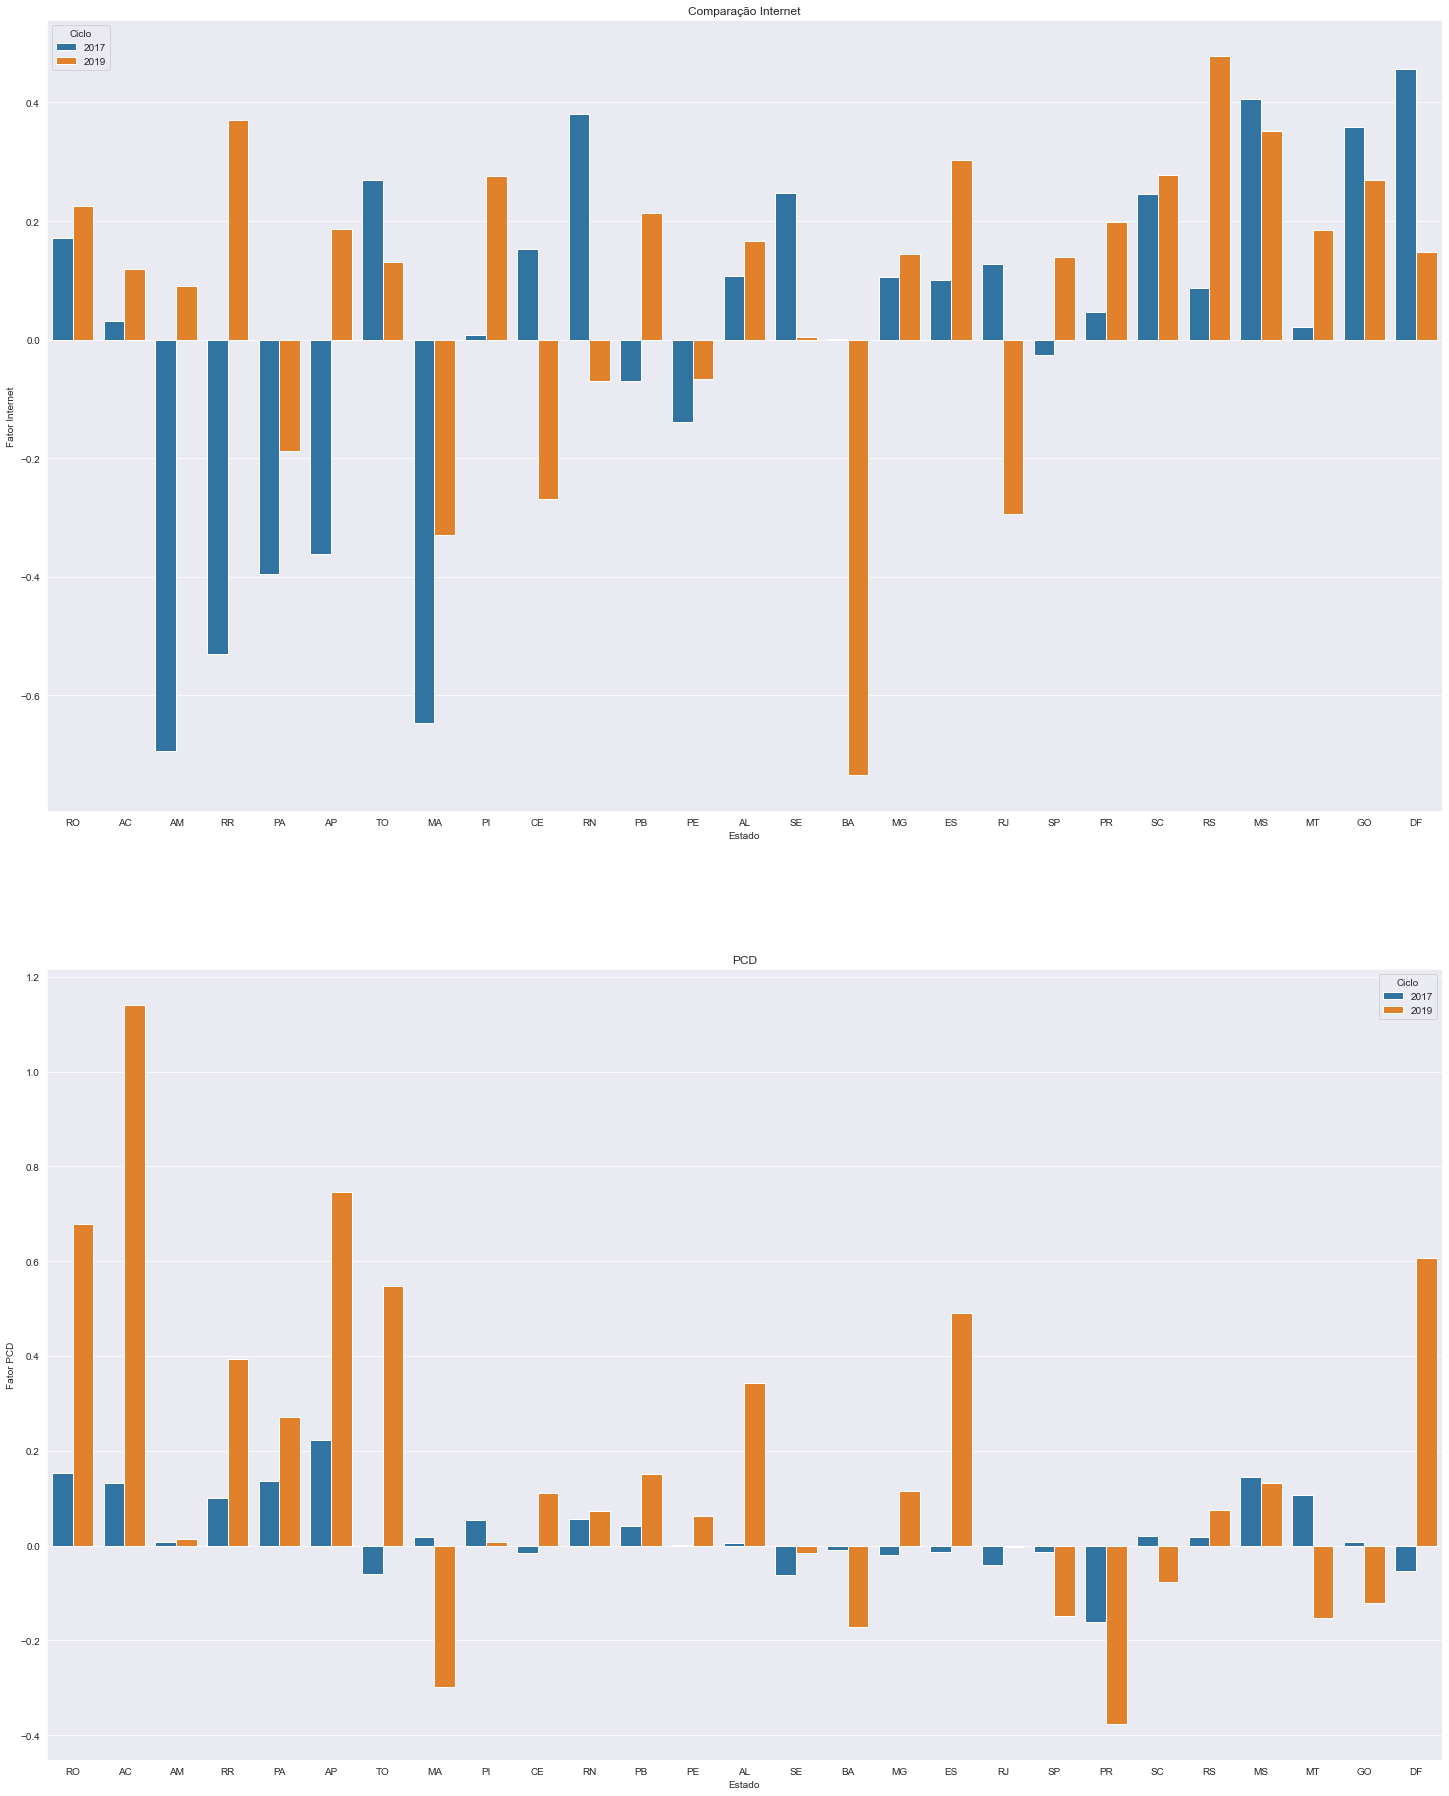

In [89]:
fig, axs = plt.subplots(2, 1, figsize=(25, 32))


sns.barplot(ax=axs[0], x = "Estado", y = "Internet", data = df_media, hue='Ciclo')
sns.barplot(ax=axs[1], x = "Estado", y = "PCD", data = df_media, hue='Ciclo')
#sns.barplot(ax= 3, x = "Estado", y = "Estrutura", data = df_media, hue='Ciclo')

axs[0].set_title('Comparação Internet')
axs[1].set_title('PCD')

axs[0].set_ylabel('Fator Internet')
axs[1].set_ylabel('Fator PCD')



In [59]:
#fig = px.bar(df_media, x='ID_UF', y='Estrutura', color='Ciclo', barmode='group')
fig = px.bar(df_media, x="ID_UF", y="Estrutura",
             color="Ciclo",
             barmode = 'group')

fig.show()

In [49]:
fig = px.bar(df_filtrado, x='Ciclo', y='Estrutura', barmode='group')

fig.show()

In [52]:
fig = px.bar(df, x='ID_UF', y='Estrutura', color='Ciclo', barmode='group')

#fig.show()

In [16]:
fig = px.bar(df, x='coluna', y=['Estrutura_17', 'Estrutura_19'], barmode='group')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['ID_UF_x', 'ID_ESCOLA', 'NO_ENTIDADE_17', 'Estrutura_17', 'TratamentoLixo_17', 'Internet_17', 'PCD_17', 'ID_UF_y', 'NO_ENTIDADE_19', 'Estrutura_19', 'TratamentoLixo_19', 'PCD_19', 'Internet_19'] but received: coluna